## Methods to initialize patches data structure  

In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
# from features3D import PatchExtractor3D
from tomo_encoders import Patches
import pandas as pd
import numpy as np

In [2]:
vol_shape = (351, 350)

In [3]:
def plot_2D_planes(p, ax):
    ax.scatter(p.centers()[:,0], p.centers()[:,1], c = p.widths[:,0])
    ax.set_xlim([0, vol_shape[0]])
    ax.set_ylim([0, vol_shape[1]])    

**test initialization with multiple widths on a grid**

In [4]:
model_size = (64,64)
kwargs = {"initialize_by" : 'multiple-grids',
          "min_patch_size" : model_size, \
          "max_stride" : 2, "n_points" : None}
p_random = Patches(vol_shape, **kwargs)
print(p_random.points.shape)

(45, 2)


In [5]:
p_random._check_valid_points()

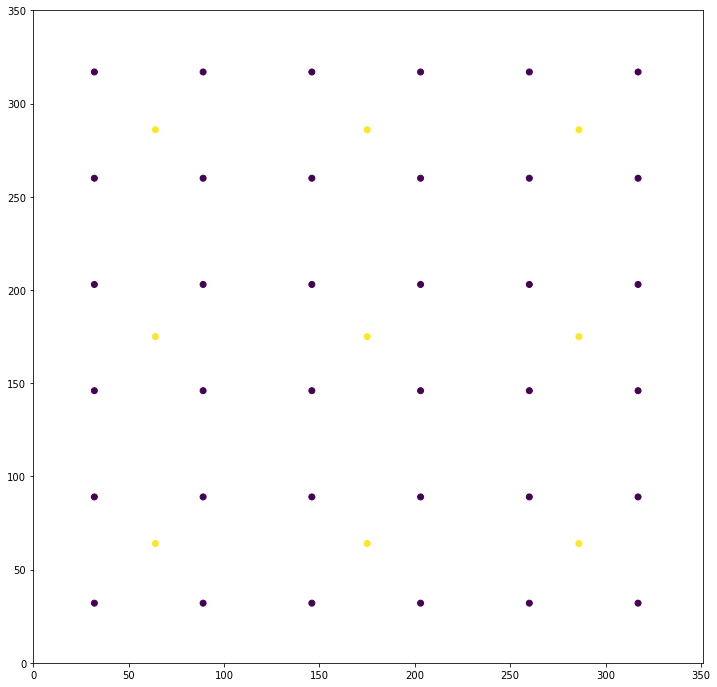

In [6]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
plot_2D_planes(p_random, ax)

(100, 2)


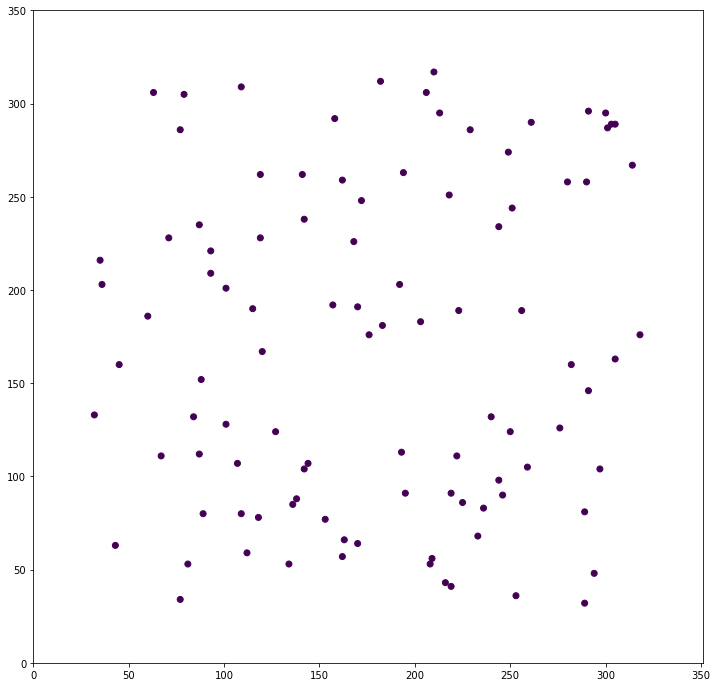

In [7]:
model_size = (64,64)
kwargs = {"initialize_by" : 'random-fixed-width',
          "patch_size" : model_size, \
          "n_points" : 100}
p_random = Patches(vol_shape, **kwargs)
print(p_random.points.shape)
fig, ax = plt.subplots(1,1, figsize = (12,12))
plot_2D_planes(p_random, ax)
p_random._check_valid_points()

(100, 2)


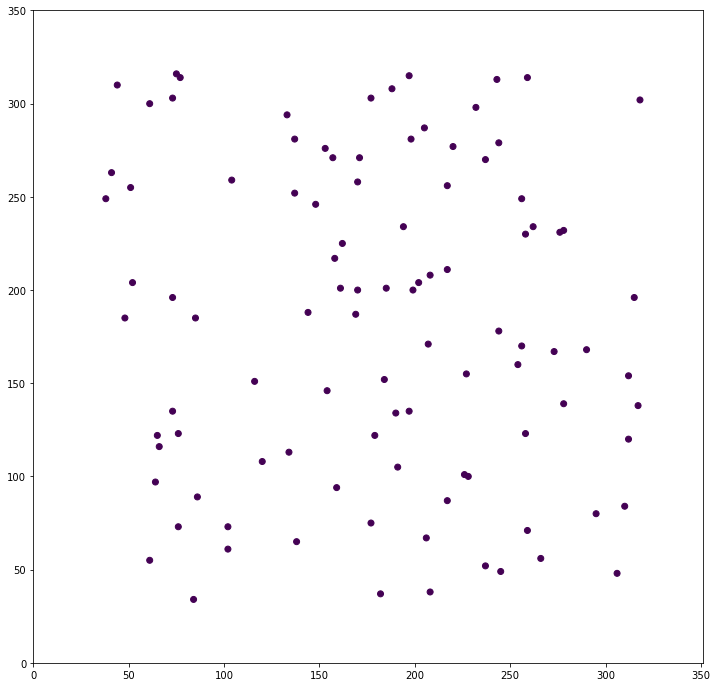

In [8]:
model_size = (64,64)
kwargs = {"initialize_by" : 'random',
          "min_patch_size" : model_size, \
          "max_stride" : 2, "n_points" : 100}
p_random = Patches(vol_shape, **kwargs)
print(p_random.points.shape)
fig, ax = plt.subplots(1,1, figsize = (12,12))
plot_2D_planes(p_random, ax)
p_random._check_valid_points()

**test append patches to self**

In [9]:
model_size = (64,64)
max_stride = 2
nf = 5
n_points = 100
initialize_by = 'random'
p1 = Patches(vol_shape, initialize_by = initialize_by, \
                   min_patch_size = model_size, \
             max_stride = max_stride, n_points = n_points)

p1.add_features(np.random.normal(0, 1, (p1.points.shape[0], nf)),\
                  names = ['h%02d'%i for i in range(nf)])

In [10]:
nf = 5
max_stride = 2
n_points = 100
p2 = Patches(vol_shape, initialize_by = initialize_by, \
                   min_patch_size = model_size, \
             max_stride = max_stride, n_points = n_points, \
             features = np.random.normal(0, 1, (n_points, nf)), \
             names = ['h%02d'%i for i in range(nf)])

In [11]:
p1.append(p2)
print(p1.points.shape)
print(p1.features.shape)
print(p1.feature_names)

(200, 2)
(200, 5)
['h00', 'h01', 'h02', 'h03', 'h04']


**test select random sample; select by indices**

In [12]:
p2_sel = p2.select_by_indices([0,10,20])
print(p2_sel.points[:3])
p2_rand_sel = p2.select_random_sample(10)
print(p2_rand_sel.points[:3])

[[279  29]
 [154 169]
 [102 269]]
[[279 171]
 [195 269]
 [238 263]]
